# 6.3 Preprocess department 24-00013 (Minneapolis, MN)

I haven't even taken a look at this before.

The kind of data is UOF, from 2008 to 2017.

In [73]:
import geopandas
import matplotlib.pyplot
import pandas
import shapely

from cpe_help import Department, util

In [2]:
dept = Department('24-00013')
path = dept.tabular_input_dir / '24-00013_UOF_2008-2017_prepped.csv'
df = pandas.read_csv(path, low_memory=False, skiprows=[1])

In [3]:
df.shape

(25801, 13)

In [4]:
df.head().T

,0,1,2,3,4
LOCATION_LONGITUDE,-93.2717,-93.2717,-93.2717,-93.247,-93.247
LOCATION_LATITUDE,45.008,45.008,45.008,44.9597,44.9597
INCIDENT_UNIQUE_IDENTIFIER,1,2,3,4,5
INCIDENT_DATE,2008-01-01,2008-01-01,2008-01-01,2008-01-01,2008-01-01
INCIDENT_TIME,01:15:31.000Z,01:15:31.000Z,01:15:31.000Z,01:27:27.000Z,01:27:27.000Z
SUBJECT_INJURY,-1,-1,-1,0,0
TYPE_OF_FORCE_USED,BodilyForceType,BodilyForceType,BodilyForceType,BodilyForceType,BodilyForceType
WEAPON_OR_TOOL_USED,Push Away,Body Weight to Pin,Punches,Joint Lock,Body Weight to Pin
SUBJECT_RACE,Black,Black,Black,White,White
SUBJECT_GENDER,Female,Female,Female,Male,Male


Looks simple

# Split occurences

*before date*

Just by looking at the first entries, it is possible to see that there were occurences that were split into multiple entries (for example, the first three entries are exactly the same, except for the TYPE_OF_FORCE_USED). This may cause a problem in counts, and, we want to standardize by subject affected or by occurence itself.

In [5]:
i = 0 
for datetime, group in df.groupby(['INCIDENT_DATE', 'INCIDENT_TIME']):
    if group.shape[0] > 1:
        from IPython.display import display
        display(group)
    
    i += 1
    if i > 50:
        break

,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
17,0.0,0.0,3241,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
18,0.0,0.0,3242,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
19,0.0,0.0,3243,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
20,0.0,0.0,3244,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
21,0.0,0.0,3245,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
22,0.0,0.0,3246,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
23,0.0,0.0,3247,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
24,0.0,0.0,3248,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
25,0.0,0.0,3249,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
26,0.0,0.0,3250,2008-01-01,00:00:00.000Z,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
0,-93.271699,45.008036,1,2008-01-01,01:15:31.000Z,-1.0,BodilyForceType,Push Away,Black,Female,25.0,Assaulted Officer,2.0
1,-93.271699,45.008036,2,2008-01-01,01:15:31.000Z,-1.0,BodilyForceType,Body Weight to Pin,Black,Female,25.0,Assaulted Officer,2.0
2,-93.271699,45.008036,3,2008-01-01,01:15:31.000Z,-1.0,BodilyForceType,Punches,Black,Female,25.0,Assaulted Officer,2.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
3,-93.24702,44.959744,4,2008-01-01,01:27:27.000Z,0.0,BodilyForceType,Joint Lock,White,Male,27.0,Commission of Crime,3.0
4,-93.24702,44.959744,5,2008-01-01,01:27:27.000Z,0.0,BodilyForceType,Body Weight to Pin,White,Male,27.0,Commission of Crime,3.0
5,-93.24702,44.959744,6,2008-01-01,01:27:27.000Z,0.0,TaserDeployed,Firing Darts,White,Male,27.0,Commission of Crime,3.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
6,-93.273141,44.980808,7,2008-01-01,01:29:47.000Z,NaN,BodilyForceType,Push Away,White,Male,39.0,Commission of Crime,1.0
7,-93.273141,44.980808,8,2008-01-01,01:29:47.000Z,NaN,BodilyForceType,Body Weight to Pin,White,Male,39.0,Commission of Crime,1.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
8,-93.273109,44.979187,9,2008-01-01,01:40:02.000Z,NaN,BodilyForceType,Joint Lock,White,Male,42.0,Tensed,1.0
9,-93.273109,44.979187,10,2008-01-01,01:40:02.000Z,NaN,BodilyForceType,Body Weight to Pin,White,Male,42.0,Tensed,1.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
11,-93.279645,44.954638,12,2008-01-01,17:02:44.000Z,0.0,TaserDeployed,Firing Darts,Black,Male,45.0,Verbal Non-Compliance,5.0
12,-93.279645,44.954638,13,2008-01-01,17:02:44.000Z,0.0,TaserDeployed,Firing Darts,Black,Male,45.0,Verbal Non-Compliance,5.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
15,-93.288002,45.010125,16,2008-01-01,21:49:34.000Z,0.0,TaserDeployed,Firing Darts,Black,Male,43.0,Fled in Vehicle,4.0
16,-93.288002,45.010125,17,2008-01-01,21:49:34.000Z,0.0,BodilyForceType,Punches,Black,Male,43.0,Fled in Vehicle,4.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
108,-93.29104,44.98883,22,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Push Away,Asian,Male,14.0,Fled on Foot,4.0
109,-93.29104,44.98883,23,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Body Weight to Pin,Asian,Male,14.0,Fled on Foot,4.0
110,-93.29104,44.98883,24,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Punches,Asian,Male,14.0,Fled on Foot,4.0
111,-93.29104,44.98883,25,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Knees,Asian,Male,14.0,Fled on Foot,4.0
112,-93.29104,44.98883,26,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Knees,Other / Mixed Race,Male,15.0,Fled on Foot,4.0
113,-93.29104,44.98883,27,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Knees,Other / Mixed Race,Male,15.0,Fled on Foot,4.0
114,-93.29104,44.98883,28,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Joint Lock,Asian,Male,16.0,Fled on Foot,4.0
115,-93.29104,44.98883,29,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Punches,Asian,Male,16.0,Fled on Foot,4.0
116,-93.29104,44.98883,30,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Knees,Asian,Male,16.0,Fled on Foot,4.0
117,-93.29104,44.98883,31,2008-01-03,03:20:24.000Z,0.0,BodilyForceType,Kicks,Asian,Male,16.0,Fled on Foot,4.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
119,-93.296905,44.925909,33,2008-01-04,10:40:37.000Z,0.0,BodilyForceType,Joint Lock,White,Male,31.0,Unspecified,5.0
120,-93.296905,44.925909,34,2008-01-04,10:40:37.000Z,0.0,BodilyForceType,Body Weight to Pin,White,Male,31.0,Unspecified,5.0
121,-93.296905,44.925909,35,2008-01-04,10:40:37.000Z,0.0,BodilyForceType,Punches,White,Male,31.0,Unspecified,5.0
122,-93.296905,44.925909,36,2008-01-04,10:40:37.000Z,0.0,BodilyForceType,Body Weight to Pin,White,Male,31.0,Unspecified,5.0
123,-93.296905,44.925909,37,2008-01-04,10:40:37.000Z,0.0,BodilyForceType,Punches,White,Male,31.0,Unspecified,5.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
124,-93.225106,44.898115,38,2008-01-04,13:30:33.000Z,-1.0,TaserDeployed,Touch,Black,Male,18.0,Fled in Vehicle,3.0
125,-93.225106,44.898115,39,2008-01-04,13:30:33.000Z,-1.0,BodilyForceType,Punches,Black,Male,18.0,Fled in Vehicle,3.0
126,-93.225106,44.898115,40,2008-01-04,13:30:33.000Z,-1.0,BodilyForceType,Kicks,Black,Male,18.0,Fled in Vehicle,3.0
127,-93.225106,44.898115,41,2008-01-04,13:30:33.000Z,-1.0,BodilyForceType,Kicks,Black,Male,18.0,Fled in Vehicle,3.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
133,-93.293351,44.999153,47,2008-01-05,17:08:18.000Z,0.0,BodilyForceType,Punches,Black,Male,23.0,Fled in Vehicle,4.0
134,-93.293351,44.999153,48,2008-01-05,17:08:18.000Z,0.0,BodilyForceType,Knees,Black,Male,23.0,Fled in Vehicle,4.0
135,-93.293351,44.999153,49,2008-01-05,17:08:18.000Z,0.0,BodilyForceType,Punches,Black,Male,23.0,Fled in Vehicle,4.0
136,-93.293351,44.999153,50,2008-01-05,17:08:18.000Z,0.0,BodilyForceType,Kicks,Black,Male,23.0,Fled in Vehicle,4.0
137,-93.293351,44.999153,51,2008-01-05,17:08:18.000Z,0.0,BodilyForceType,Kicks,Black,Male,23.0,Fled in Vehicle,4.0
138,-93.293351,44.999153,52,2008-01-05,17:08:18.000Z,0.0,TaserDeployed,Firing Darts,Black,Male,23.0,Fled in Vehicle,4.0
139,-93.293351,44.999153,53,2008-01-05,17:08:18.000Z,0.0,BodilyForceType,Body Weight to Pin,Black,Male,23.0,Fled in Vehicle,4.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
143,-93.269582,44.962688,57,2008-01-07,14:31:58.000Z,0.0,ChemIrritant,Personal Mace,Black,Male,34.0,Verbal Non-Compliance,3.0
144,-93.269582,44.962688,58,2008-01-07,14:31:58.000Z,0.0,BodilyForceType,Body Weight to Pin,Black,Male,34.0,Verbal Non-Compliance,3.0
145,-93.269582,44.962688,59,2008-01-07,14:31:58.000Z,0.0,BodilyForceType,Knees,Black,Male,34.0,Verbal Non-Compliance,3.0
146,-93.269582,44.962688,60,2008-01-07,14:31:58.000Z,0.0,BodilyForceType,Punches,Black,Male,34.0,Verbal Non-Compliance,3.0
147,-93.269582,44.962688,61,2008-01-07,14:31:58.000Z,0.0,BodilyForceType,Knees,Black,Male,34.0,Verbal Non-Compliance,3.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
150,-93.278939,44.97924,64,2008-01-07,22:07:54.000Z,0.0,BodilyForceType,Joint Lock,Black,Male,48.0,Commission of Crime,1.0
151,-93.278939,44.97924,65,2008-01-07,22:07:54.000Z,0.0,BodilyForceType,Body Weight to Pin,Black,Male,48.0,Commission of Crime,1.0
152,-93.278939,44.97924,66,2008-01-07,22:07:54.000Z,0.0,BodilyForceType,Slaps,Black,Male,48.0,Commission of Crime,1.0
153,-93.278939,44.97924,67,2008-01-07,22:07:54.000Z,0.0,BodilyForceType,Joint Lock,Black,Male,48.0,Commission of Crime,1.0
154,-93.278939,44.97924,68,2008-01-07,22:07:54.000Z,0.0,BodilyForceType,Body Weight to Pin,Black,Male,48.0,Commission of Crime,1.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
155,-93.281566,44.995809,69,2008-01-08,02:07:17.000Z,0.0,BodilyForceType,Punches,Black,Male,29.0,Tensed,4.0
156,-93.281566,44.995809,70,2008-01-08,02:07:17.000Z,0.0,BodilyForceType,Knees,Black,Male,29.0,Tensed,4.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
157,-93.299256,44.980557,71,2008-01-08,14:20:21.000Z,NaN,BodilyForceType,Joint Lock,Black,Male,13.0,Tensed,4.0
158,-93.299256,44.980557,72,2008-01-08,14:20:21.000Z,NaN,BodilyForceType,Push Away,Black,Male,13.0,Tensed,4.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
161,-93.252466,45.007207,75,2008-01-10,21:14:43.000Z,-1.0,BodilyForceType,Body Weight to Pin,White,Male,44.0,Fled in Vehicle,2.0
162,-93.252466,45.007207,76,2008-01-10,21:14:43.000Z,-1.0,BodilyForceType,Punches,White,Male,44.0,Fled in Vehicle,2.0
163,-93.252466,45.007207,77,2008-01-10,21:14:43.000Z,-1.0,BodilyForceType,Punches,White,Male,44.0,Fled in Vehicle,2.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
164,-93.265782,44.943185,78,2008-01-10,22:21:53.000Z,-1.0,BodilyForceType,Punches,White,Male,22.0,Fled in Vehicle,3.0
165,-93.265782,44.943185,79,2008-01-10,22:21:53.000Z,-1.0,TaserDeployed,Firing Darts,White,Male,22.0,Fled in Vehicle,3.0
166,-93.265782,44.943185,80,2008-01-10,22:21:53.000Z,-1.0,BodilyForceType,Slaps,White,Male,22.0,Fled in Vehicle,3.0
167,-93.265782,44.943185,81,2008-01-10,22:21:53.000Z,-1.0,ImprovisedWeaponType,Flashlight,White,Male,22.0,Fled in Vehicle,3.0
168,-93.265782,44.943185,82,2008-01-10,22:21:53.000Z,-1.0,BodilyForceType,Punches,White,Male,22.0,Fled in Vehicle,3.0
169,-93.265782,44.943185,83,2008-01-10,22:21:53.000Z,-1.0,BodilyForceType,Body Weight to Pin,White,Male,22.0,Fled in Vehicle,3.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
173,-93.294958,45.011326,87,2008-01-12,22:26:04.000Z,0.0,BodilyForceType,Slaps,Black,Male,43.0,Verbal Non-Compliance,4.0
174,-93.294958,45.011326,88,2008-01-12,22:26:04.000Z,0.0,BodilyForceType,Knees,Black,Male,43.0,Verbal Non-Compliance,4.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
175,-93.307013,44.98699,89,2008-01-12,23:41:11.000Z,-1.0,BodilyForceType,Body Weight to Pin,Unknown,Male,16.0,Tensed,4.0
176,-93.307013,44.98699,90,2008-01-12,23:41:11.000Z,-1.0,BodilyForceType,Punches,Unknown,Male,16.0,Tensed,4.0


,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
178,-93.251092,44.961813,92,2008-01-13,03:21:52.000Z,0.0,TaserDeployed,Firing Darts,Black,Male,30.0,Fled in Vehicle,3.0
179,-93.251092,44.961813,93,2008-01-13,03:21:52.000Z,0.0,BodilyForceType,Kicks,Black,Male,30.0,Fled in Vehicle,3.0


For each group of entries, the only thing that change is the TYPE_OF_FORCE_USED and WEAPON_OR_TOOL_USED. Based on this, and the fact that even subject ages are repeated, I will assume that this table has multiple entries only for different types of force used. So, for example, one incident can cause 1 entry if the police officer only did one thing and almost 10 if there was a fight involved and thi sfight was fully registered.

Also look from entries 108 to 117, there are different subjects involved in the same occurence (I'm categorizing as part of an occurence here all entries whose reported time are the same). This will cause trouble..

# Datetime

## Date

In [13]:
df.head().T

,0,1,2,3,4
LOCATION_LONGITUDE,-93.2717,-93.2717,-93.2717,-93.247,-93.247
LOCATION_LATITUDE,45.008,45.008,45.008,44.9597,44.9597
INCIDENT_UNIQUE_IDENTIFIER,1,2,3,4,5
INCIDENT_DATE,2008-01-01,2008-01-01,2008-01-01,2008-01-01,2008-01-01
INCIDENT_TIME,01:15:31.000Z,01:15:31.000Z,01:15:31.000Z,01:27:27.000Z,01:27:27.000Z
SUBJECT_INJURY,-1,-1,-1,0,0
TYPE_OF_FORCE_USED,BodilyForceType,BodilyForceType,BodilyForceType,BodilyForceType,BodilyForceType
WEAPON_OR_TOOL_USED,Push Away,Body Weight to Pin,Punches,Joint Lock,Body Weight to Pin
SUBJECT_RACE,Black,Black,Black,White,White
SUBJECT_GENDER,Female,Female,Female,Male,Male


There seems to be a date column and a time column to this. We can parse them and then join the result.

In [14]:
date = df['INCIDENT_DATE']
datef = pandas.to_datetime(date, format='%Y-%m-%d')

In [15]:
datef.describe()

count                   25801
unique                   3488
top       2011-01-01 00:00:00
freq                      115
first     2008-01-01 00:00:00
last      2018-06-03 00:00:00
Name: INCIDENT_DATE, dtype: object

Dates go from 2008 to 2018. Weirdly, the top date for reporting was January 1st, 2011. This may be because of the New Year's Eve.

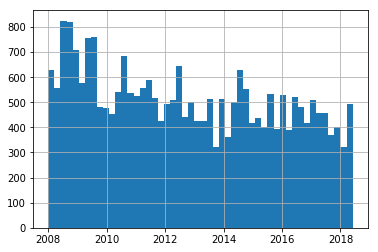

In [17]:
datef.hist(bins=50)

Dates are nicely spread across the range.

## Time

In [26]:
time = df['INCIDENT_TIME']
timef = pandas.to_datetime(time)
timef.head()

0   2018-11-21 01:15:31
1   2018-11-21 01:15:31
2   2018-11-21 01:15:31
3   2018-11-21 01:27:27
4   2018-11-21 01:27:27
Name: INCIDENT_TIME, dtype: datetime64[ns]

In [27]:
timef.describe()

count                   25801
unique                   9720
top       2018-11-21 00:00:00
freq                      957
first     2018-11-21 00:00:00
last      2018-11-21 23:59:55
Name: INCIDENT_TIME, dtype: object

From midnight to 23:59, as expected.

In [30]:
timef.value_counts().head()

2018-11-21 00:00:00    957
2018-11-21 01:55:00     31
2018-11-21 18:40:17     19
2018-11-21 12:55:47     19
2018-11-21 02:39:21     19
Name: INCIDENT_TIME, dtype: int64

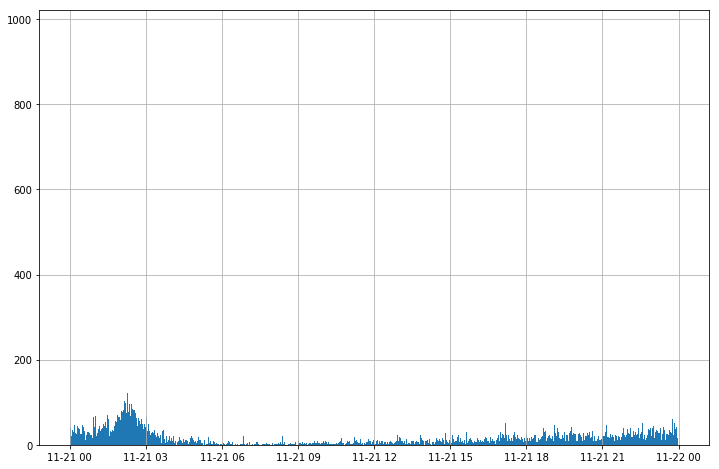

In [31]:
timef.hist(bins=1440, figsize=(12, 8))

All times are well distributed, except for a sharp spike at midnight. I guess this is the time corresponding to NaN.

This might be problematic, but, it corresponds only to 3.7% of the data, and may possibly be erased without problems.

## Joining date and time

There are two possible ways of doing this:

- Parse date and time separately, join them later
- Join the string, calculate the final datetime directly

I'll take the second approach, as it looks simple.

In [34]:
df.head()

,LOCATION_LONGITUDE,LOCATION_LATITUDE,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_INJURY,TYPE_OF_FORCE_USED,WEAPON_OR_TOOL_USED,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE,REASON_FOR_FORCE,LOCATION_DISTRICT
0,-93.271699,45.008036,1,2008-01-01,01:15:31.000Z,-1.0,BodilyForceType,Push Away,Black,Female,25.0,Assaulted Officer,2.0
1,-93.271699,45.008036,2,2008-01-01,01:15:31.000Z,-1.0,BodilyForceType,Body Weight to Pin,Black,Female,25.0,Assaulted Officer,2.0
2,-93.271699,45.008036,3,2008-01-01,01:15:31.000Z,-1.0,BodilyForceType,Punches,Black,Female,25.0,Assaulted Officer,2.0
3,-93.247020,44.959744,4,2008-01-01,01:27:27.000Z,0.0,BodilyForceType,Joint Lock,White,Male,27.0,Commission of Crime,3.0
4,-93.247020,44.959744,5,2008-01-01,01:27:27.000Z,0.0,BodilyForceType,Body Weight to Pin,White,Male,27.0,Commission of Crime,3.0


In [45]:
date = df['INCIDENT_DATE']
time = df['INCIDENT_TIME']

datetime = ['{}T{}'.format(d, t) for d, t in zip(date, time)]
datetime = pandas.Series(datetime, index=date.index)
datetime.head()

0    2008-01-01T01:15:31.000Z
1    2008-01-01T01:15:31.000Z
2    2008-01-01T01:15:31.000Z
3    2008-01-01T01:27:27.000Z
4    2008-01-01T01:27:27.000Z
dtype: object

In [47]:
datetimef = pandas.to_datetime(datetime)
datetimef.head()

0   2008-01-01 01:15:31
1   2008-01-01 01:15:31
2   2008-01-01 01:15:31
3   2008-01-01 01:27:27
4   2008-01-01 01:27:27
dtype: datetime64[ns]

In [48]:
datetimef.describe()

count                   25801
unique                  10916
top       2013-01-01 00:00:00
freq                       87
first     2008-01-01 00:00:00
last      2018-06-03 22:05:02
dtype: object

Everything looks fine.

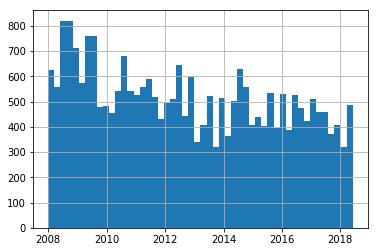

In [54]:
datetimef.hist(bins=50)

Well distributed... Ok!

# Location

In [56]:
location = df[[c  for c in df if c.startswith('LOCATION')]]
location.head()

,LOCATION_LONGITUDE,LOCATION_LATITUDE,LOCATION_DISTRICT
0,-93.271699,45.008036,2.0
1,-93.271699,45.008036,2.0
2,-93.271699,45.008036,2.0
3,-93.247020,44.959744,3.0
4,-93.247020,44.959744,3.0


Plain old latitude longitude. Let's verify the CRS in the provided shapefile.

In [57]:
dept.load_external_shapefile().crs

{'init': 'epsg:4326'}

Perfect!

Verify integrity:

In [ ]:
lat = df['LOCATION_LATITUDE']
lon = df['LOCATION_LONGITUDE']

In [65]:
lat.isnull().any()

False

In [66]:
lon.isnull().any()

False

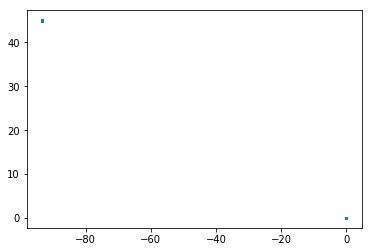

In [68]:
fig, ax = matplotlib.pyplot.subplots()

ax.scatter(lon, lat, s=1, alpha=0.5)

Some (0, 0) entries.

In [69]:
geocoded = (lat != 0) & (lon != 0)
geocoded.mean()

0.9580248827564823

In [75]:
# create GeoDataFrame

zipped = zip(df['LOCATION_LATITUDE'], df['LOCATION_LONGITUDE'], geocoded)
Point = shapely.geometry.Point
geometry = [Point(lon, lat) if coded else Point()
            for lat, lon, coded in zipped]

gdf = geopandas.GeoDataFrame(
    df,
    geometry=geometry,
    crs=util.crs.epsg4326,
)
gdf['LOCATION_GEOCODED'] = geocoded

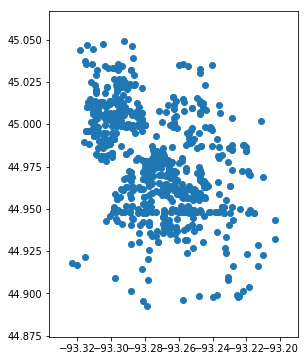

In [79]:
gdf.sample(1000).plot(figsize=(8, 6))

Looks fine

# Ending (not so much) remarks

There's the date problem, there's the multiple entries problem. We will try to solve those later...